In [13]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/homeprices.csv')

In [14]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [15]:
new_df=pd.get_dummies(df.town) # you wanna add one-hot factor into col town
new_df

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [16]:
#merge the table

merged = pd.concat([df,new_df], axis=1) # axis='columns'
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [17]:
x=merged.drop(['town','price','west windsor'],axis='columns')
x

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [18]:
y= merged.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [20]:
model.predict([[2800,0,1]])

/Users/haleyk/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [21]:
model.predict([[3400,0,1]])

/Users/haleyk/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([666914.10449365])

In [22]:
model.score(x,y) #quite accurate 

0.9573929037221871

In [23]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

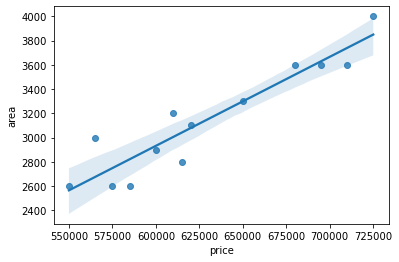

In [25]:
sns.regplot(data=merged,y='area',x='price'); 

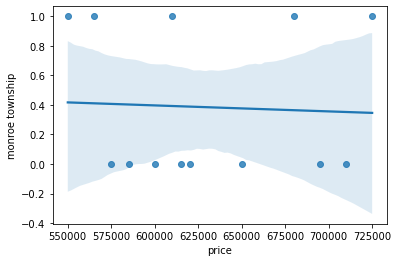

In [26]:
sns.regplot(data=merged,y='monroe township',x='price');

TypeError: unhashable type: 'Series'

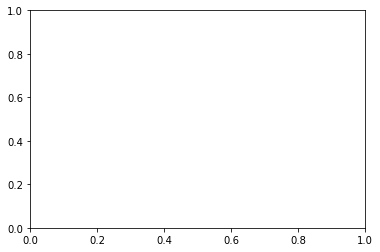

In [45]:

plt.figure()
plt.plot(merged['price'], merged['area'], data=merged)
plt.show()